<span style="font-size:30px;">[TASK 2] EDA ON TITANIC DATASET.</span>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
df = pd.read_csv(r"/Users/jojo/Downloads/train (1).csv")

<span style="font-size:24px;">1 Explore the Dataset.</span>

In [4]:
#1.1 First 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#1.2 Check basic information
df.shape


(891, 12)

In [6]:
#1.3 check data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#1.4 check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<span style="font-size:24px;">2. Data Cleaning.</span>

In [9]:
#2.1 handle missing age values, add median of age inplace of missing values.
df['Age'].fillna(df['Age'].median())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
#2.2 Handle missing Cabin values.  changed datatype to int.
df['Cabin'] = df['Cabin'].notna().astype(int)


In [11]:
# Handle missing Embarked values
df['Embarked'].fillna(df['Embarked'].mode()[0])


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [12]:
#2.4 check again all values
df.isnull().sum()
#all cleared.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

<span style="font-size:24px;">3. Summary Statistics.</span>

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [14]:
#3.1 Survival rate
survival_rate = df['Survived'].mean() * 100
print(f"\nOverall survival rate: {survival_rate:.2f}%")


Overall survival rate: 38.38%


In [15]:
#3.2 Survival by gender

gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival rate by gender:")
print("Female:", f"{gender_survival.get(0, 0):.2f}%")
print("Male:", f"{gender_survival.get(1, 0):.2f}%")


Survival rate by gender:
Female: 74.20%
Male: 18.89%


/var/folders/v9/50_fgfdx7d9ddx3p4n70cxtc0000gn/T/ipykernel_4144/1614693756.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Female:", f"{gender_survival.get(0, 0):.2f}%")
/var/folders/v9/50_fgfdx7d9ddx3p4n70cxtc0000gn/T/ipykernel_4144/1614693756.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Male:", f"{gender_survival.get(1, 0):.2f}%")


In [16]:
#3.3 Survival by class

class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival rate by passenger class:")
for pclass, rate in class_survival.items():
    print(f"Class {pclass}: {rate:.2f}%")
    


Survival rate by passenger class:
Class 1: 62.96%
Class 2: 47.28%
Class 3: 24.24%


<span style="font-size:24px;">Visualizations.</span>
    

Text(0.5, 0, '0 = Did not survive, 1 = Survived')

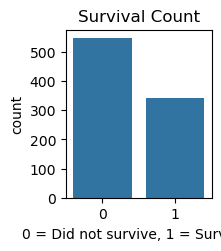

In [17]:
#4.1 Plot 1: Survival count
plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('0 = Did not survive, 1 = Survived')
    

Text(0, 0.5, 'Survival Rate')

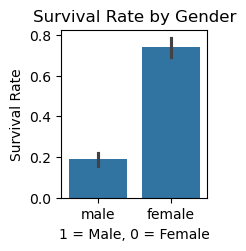

In [18]:
#4.2 Plot 2: Survival by gender
plt.subplot(2, 3, 2)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('1 = Male, 0 = Female')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

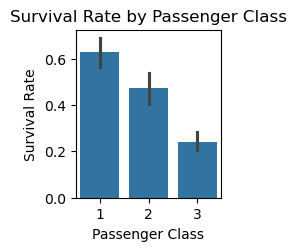

In [19]:
#4.3 Plot 3: Survival by passenger class
plt.subplot(2, 3, 3)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

Text(0.5, 0, '1 = Male, 0 = Female')

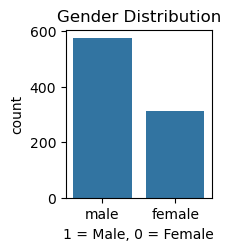

In [20]:
#simple distribution showing in graph.
# Plot 4: Gender distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('1 = Male, 0 = Female')

Text(0.5, 1.0, 'Passenger Class Distribution')

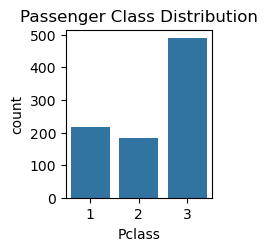

In [21]:
# Plot 5: Passenger class distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')

<span style="font-size:30px;">BONUS TASKS.</span>

/var/folders/v9/50_fgfdx7d9ddx3p4n70cxtc0000gn/T/ipykernel_4144/3903075540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df,palette='viridis')


Text(0, 0.5, 'Survival Rate')

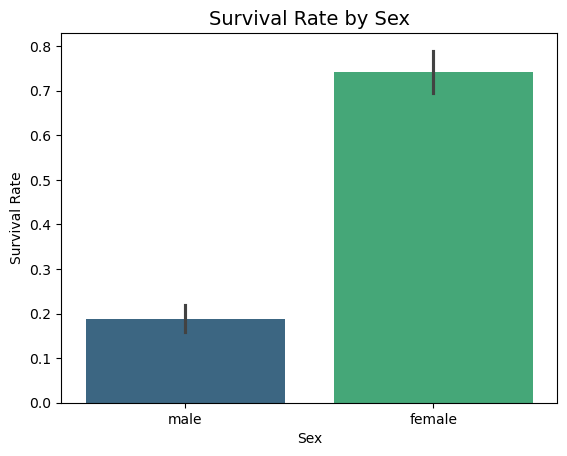

In [23]:
#5.1 Bar plot of survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df,palette='viridis')
plt.title('Survival Rate by Sex', fontsize=14)
plt.ylabel('Survival Rate')

/var/folders/v9/50_fgfdx7d9ddx3p4n70cxtc0000gn/T/ipykernel_4144/4208280548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


Text(0.5, 0, 'Passenger Class')

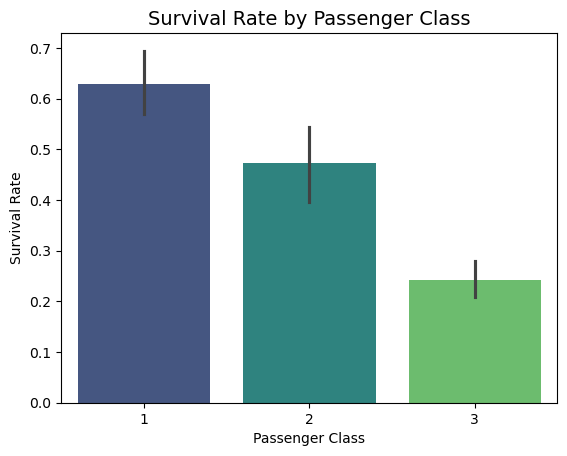

In [24]:
#5.2 Bar plot of survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')

/var/folders/v9/50_fgfdx7d9ddx3p4n70cxtc0000gn/T/ipykernel_4144/367861280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')


Text(0.5, 0, 'Embarkation Point (C=Cherbourg, Q=Queenstown, S=Southampton)')

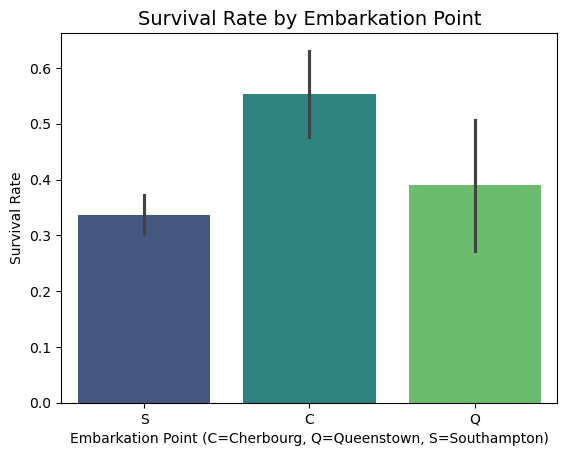

In [25]:
#5.3 Bar plot of survival rate by embarkation point
sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Embarkation Point', fontsize=14)
plt.ylabel('Survival Rate')
plt.xlabel('Embarkation Point (C=Cherbourg, Q=Queenstown, S=Southampton)')


/var/folders/v9/50_fgfdx7d9ddx3p4n70cxtc0000gn/T/ipykernel_4144/1693333274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Survived', data=df, palette='viridis')


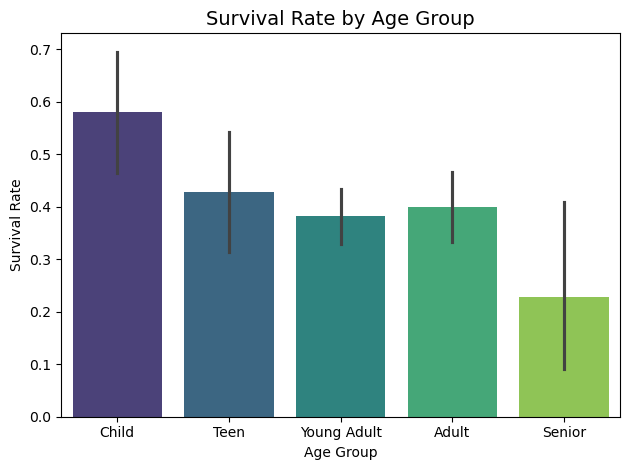

In [26]:
#5.4 Create age groups for better visualization
# Create age bins
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='Age_Group', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Age Group', fontsize=14)
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')

plt.tight_layout()
plt.savefig('survival_barplots.png')
plt.show()


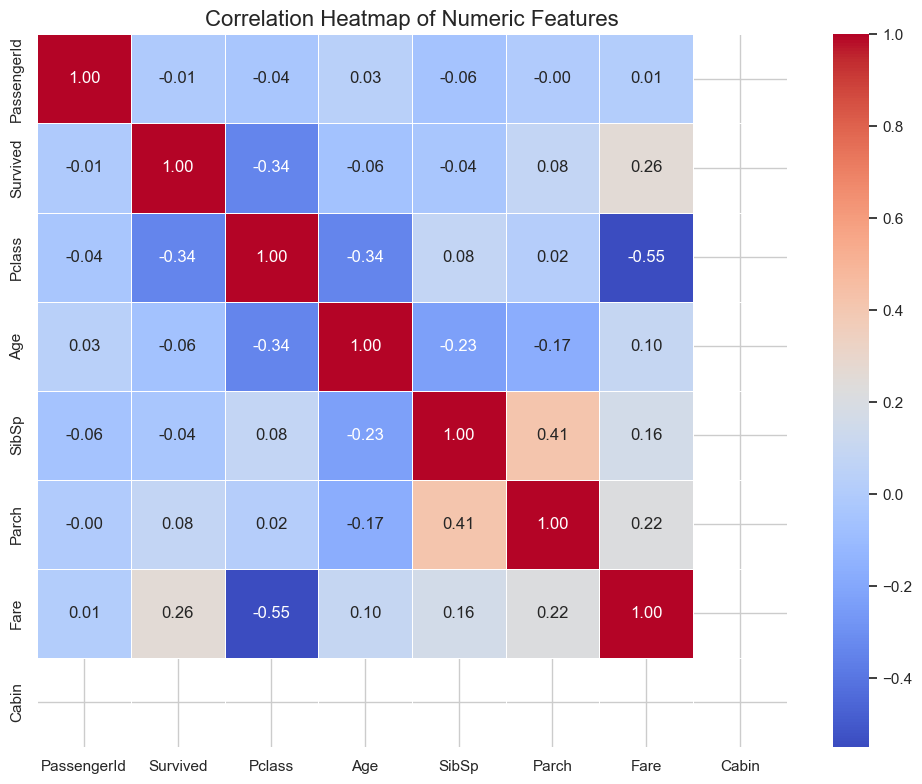

In [100]:
# HEATMAP.
#5.5 heatmap showing survival correlation with numeric features
plt.figure(figsize=(10, 8))
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Calculate correlation matrix
corr_matrix = numeric_df.corr()
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


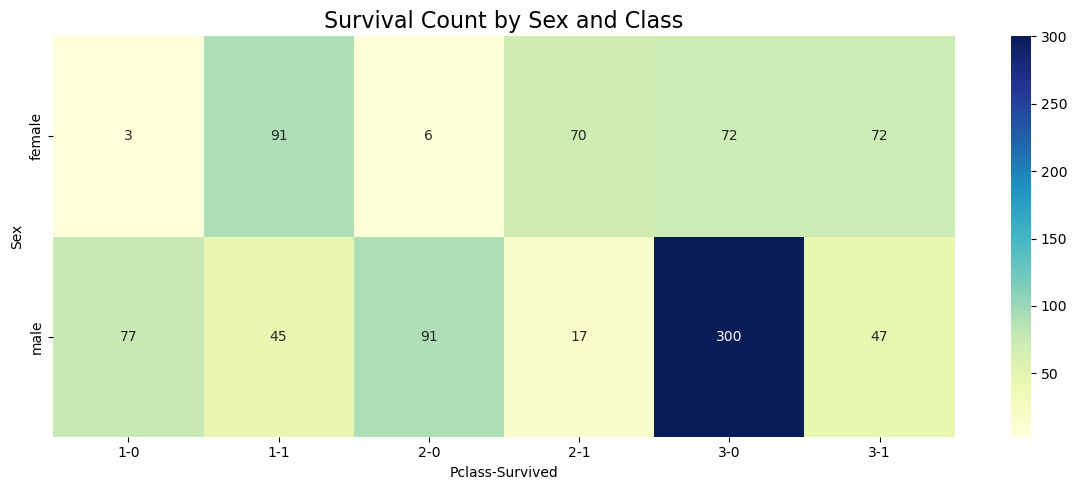

In [27]:
#5.6 cross-tabulation heatmap for categorical variables
plt.figure(figsize=(12, 5))
# Sex and Class survival heatmap
survival_by_sex_class = pd.crosstab([df['Sex']], [df['Pclass'], df['Survived']])
sns.heatmap(survival_by_sex_class, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Survival Count by Sex and Class', fontsize=16)
plt.tight_layout()
plt.savefig('sex_class_survival_heatmap.png')
plt.show()